In [1]:
import tensorflow

# keras is a packae that helps to conviniently navigate through tensor flow and pytorch 
# pytorch is developed by facebook / meta and tensorflow is devloped by google 

import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation

We are going to make a digit classifier neural network 

it takes images of 28x28 pixels each cell will be classified for how bright it is and form a 2x2 matrix for the picctures and then we will flatten it into a 1 dimensional array and start classifying 

Dense is the number of hidden layer neurons per hidden layer thatsbeing defined 



In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt  # typo fixed here
%matplotlib inline
import numpy as np


In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

60000
60000
10000
10000


In [5]:
x_train[0].shape # each image is a 28x28 matrix 

print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

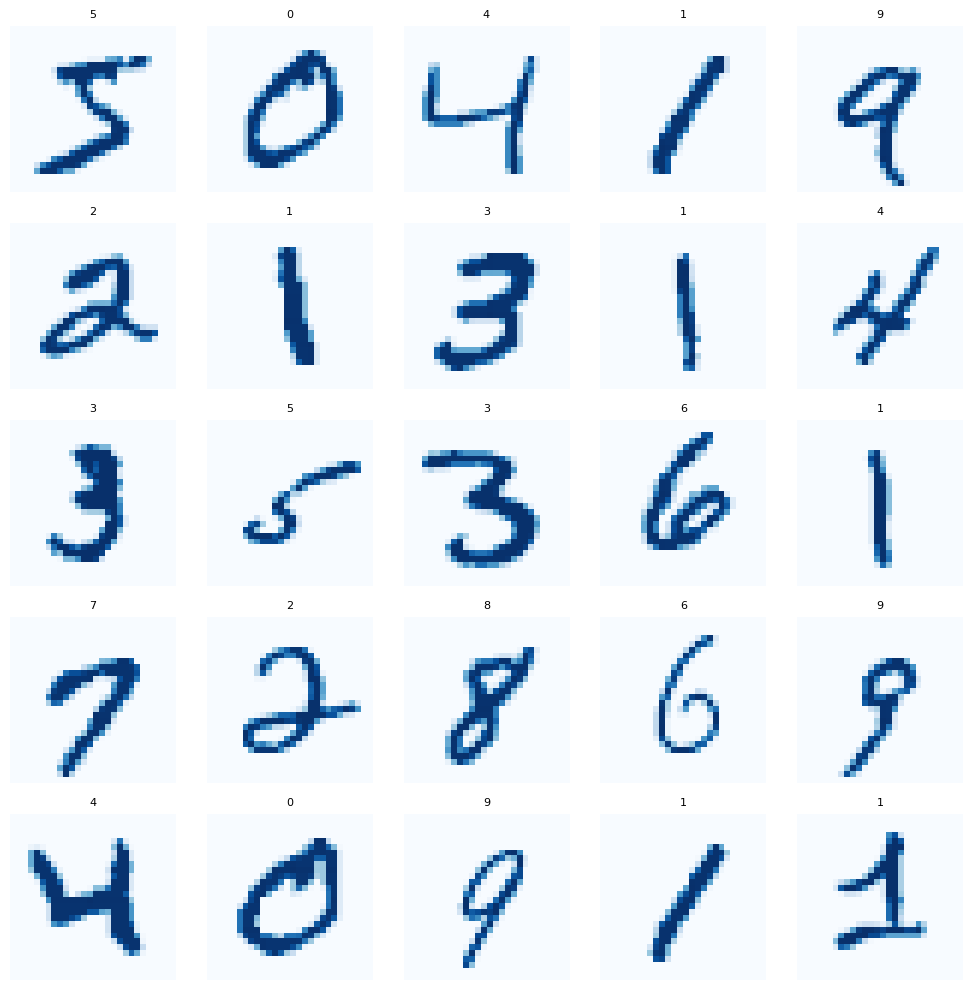

In [6]:
num_images = 25  # (5x5 grid)

# Set up the figure
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(5, 5, i + 1)  # (rows, cols, index)
    plt.imshow(x_train[i], cmap='Blues')
    plt.title(f"{y_train[i]}", fontsize=8)
    plt.axis('off')  # Hide axis

plt.tight_layout()
plt.show()

In [15]:
# we are going to flatten out t8his array now 
x_train.shape

# to reshape it 
# we are also going to scale down the values to increase the efficiency so we are going to make the vlaues in between 0 and 1 
# since the largest value is 255 lets divide the entire matrix by that 
x_train = x_train/255
x_test = x_test/255
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)

print(x_train_flatten)
print(x_train_flatten.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(60000, 784)


In [16]:
x_train_flatten[0] # for each input data it is in one row 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# here we made a neural network with 10 output nodes and 784 input shape and called the function of activation as sigmoid 

# next step is to compile the model 
# optimizers allow you to train efficiently 

model.compile( optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', # check tensorflow lossses section to learn more about the types of loss funtions that exist 
              # watch code basics linear regression single variable machine learning course video 2 to understand this 
              metrics = ['accuracy']
)

model.fit(x_train_flatten,y_train , epochs = 10) # epochs are the number of iterations your mm is going to run the training

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8127 - loss: 0.7219
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.9149 - loss: 0.3098
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.9205 - loss: 0.2848
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 885us/step - accuracy: 0.9227 - loss: 0.2740
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step - accuracy: 0.9264 - loss: 0.2618
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - accuracy: 0.9271 - loss: 0.2602
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step - accuracy: 0.9291 - loss: 0.2607
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 870us/step - accuracy: 0.9297 - loss: 0.2519
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 870us/step - accuracy: 0.9303 - loss: 0.2528
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step - accuracy: 0.9309 - loss: 0.2502


In [19]:
# lets evaluate the model 

model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9173 - loss: 0.3017


[0.2659209370613098, 0.9289000034332275]

In [22]:
y_predicted = model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step


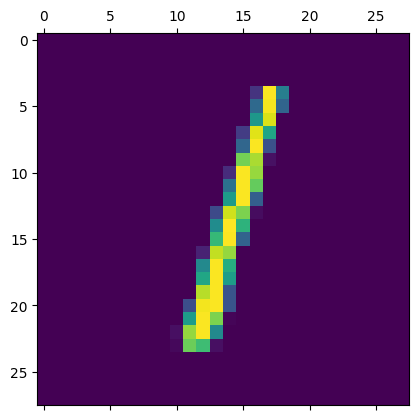

In [26]:
plt.matshow(x_test[2])

In [25]:
y_predicted[2]

# the output prints 10 scores each for each of the output neurons chekc the 7th neuron to see if thats the most in value 


array([1.4716503e-04, 9.9348295e-01, 6.4752519e-01, 2.3465246e-01,
       1.9489732e-02, 9.6288145e-02, 1.0450800e-01, 2.9864939e-02,
       3.1016010e-01, 2.5772102e-02], dtype=float32)

In [ ]:
np.argmax(y_predicted[2]) # gives us the max value of the array 

1

Thus correlates with our models prediction 

In [32]:
# to find all the predicted indexs we need to make an array of max values 

y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [34]:
# building confusion matrix
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    6,    4,    2,    1,    0],
       [   0, 1110,    6,    1,    0,    1,    3,    2,   12,    0],
       [   5,    8,  940,   14,    9,    3,    9,    8,   33,    3],
       [   3,    0,   24,  910,    1,   32,    2,    8,   24,    6],
       [   2,    1,    7,    2,  932,    0,    3,    3,   10,   22],
       [   7,    2,    5,   22,   10,  804,    9,    4,   26,    3],
       [  14,    3,   13,    1,    8,   22,  894,    1,    2,    0],
       [   1,    6,   26,    5,    9,    1,    0,  941,    4,   35],
       [   6,    8,    6,   20,    9,   26,    5,    6,  880,    8],
       [  10,    8,    1,   10,   35,    8,    0,   16,    7,  914]])>

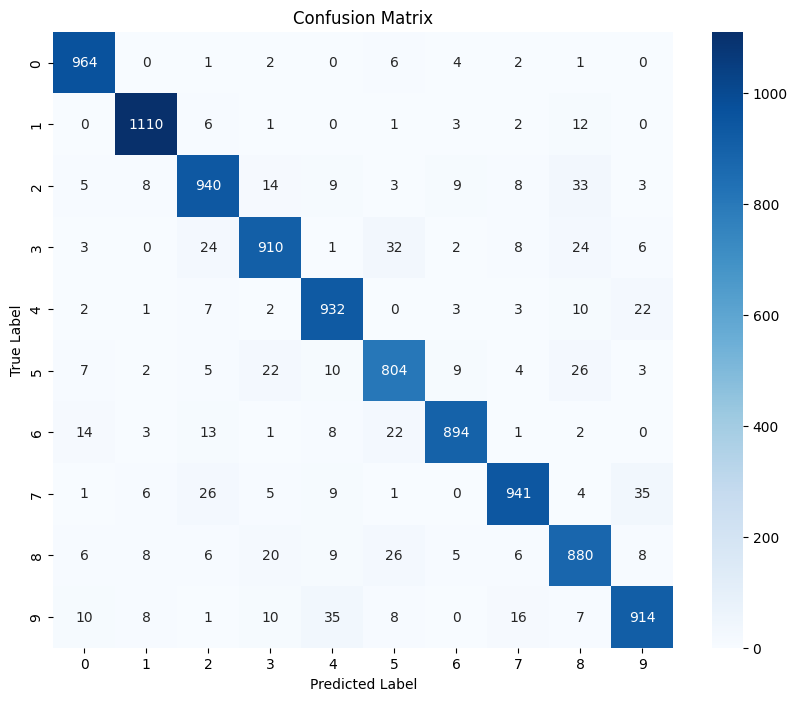

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Assuming 'cm' is your confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

# Convert cm from tensor to numpy for seaborn
cm_numpy = cm.numpy()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm_numpy, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [37]:
# now adding a denser network with a hidden layer to improve the performance 

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# here we made a neural network with 10 output nodes and 784 input shape and called the function of activation as sigmoid 

# next step is to compile the model 
# optimizers allow you to train efficiently 

model.compile( optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', # check tensorflow lossses section to learn more about the types of loss funtions that exist 
              # watch code basics linear regression single variable machine learning course video 2 to understand this 
              metrics = ['accuracy']
)

model.fit(x_train_flatten,y_train , epochs = 100) # epochs are the number of iterations your mm is going to run the training

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8760 - loss: 0.4245
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9655 - loss: 0.1148
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9769 - loss: 0.0744
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9815 - loss: 0.0562
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9860 - loss: 0.0432
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9894 - loss: 0.0309
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9906 - loss: 0.0286
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9935 - loss: 0.0203
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9926 - loss: 0.0220
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9943 - loss: 0.0171
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9958 - loss: 0.0136
Epoch 12/100
1875/1